# Problem Set 3

## Part 1
Consider the training examples shown in the table below for a binary classification problem. 

|Instance|a1|a2|a3|Target Class|
|--------|--|--|--|------------|
|1|T|T|1.0|+|
|2|T|T|6.0|+|
|3|T|F|5.0|–|
|4|F|F|4.0|+|
|5|F|T|7.0|–|
|6|F|T|3.0|–|
|7|F|F|8.0|–|
|8|T|F|7.0|+|
|9|F|T|5.0|–|
   

#### Q1: What is the entropy of this collection of training examples with respect to the positive class?
  
A: The probability of the positive class is 4 out of 9, and the probability of the negative class is 5 out of 9. We can estimate the impurity by calculating the entropy using these probability.

$$
P_{pos} = \frac{4}{9}
$$
$$  
P_{neg} = \frac{5}{9}
$$
$$
Entropy = -P_{pos}\log_{2}(P_{pos})-P_{neg}\log_{2}(P_{neg}) 
$$
$$
= - \frac{4}{9}\log_{2}(\frac{4}{9}) - \frac{5}{9}\log_{2}(\frac{5}{9}) 
$$
$$
= 0.9911   
$$


#### Q2: What are the information gains of a1 and a2 relative to these training examples?  

A: Let's calculate the entropy of each node when dividing by the value of a1.
$$
Entropy_{a_{1}=T} = -P_{pos}\log_{2}(P_{pos})-P_{neg}\log_{2}(P_{neg}) = - \frac{3}{4}\log_{2}(\frac{3}{4}) - \frac{1}{4}\log_{2}(\frac{1}{4}) = 0.81125 
$$
$$
Entropy_{a_{1}=F} = -P_{pos}\log_{2}(P_{pos})-P_{neg}\log_{2}(P_{neg}) = - \frac{1}{5}\log_{2}(\frac{1}{5}) - \frac{4}{5}\log_{2}(\frac{4}{5}) = 0.72192
$$
  
Since 4 out of 9 observations are T for a1 and 5 out of 9 observations are F for a1, the weighted entropy is the following:  
  
$$
Weighted Entropy = \frac{4}{9}\cdot Entropy_{a_{1}=T} + \frac{5}{9} \cdot Entropy_{a_{1}=F} = \frac{4}{9}\cdot 0.81125 +  \frac{5}{9} \cdot 0.72192 = 0.7616
$$
  
We already calculated the Entropy of the parent (the total training examples) to be 0.9911. Thus, the information gain from a1 is:
$$
\Delta I = Entropy_{parent} - WeightedEntropy_{a_{1}} = 0.9911 - 0.7616 = 0.2295
$$

We can repeat this process for a2
$$
Entropy_{a_{2}=T} = -P_{pos}\log_{2}(P_{pos})-P_{neg}\log_{2}(P_{neg}) = - \frac{2}{5}\log_{2}(\frac{2}{5}) - \frac{3}{5}\log_{2}(\frac{3}{5}) = 0.971
$$
$$
Entropy_{a_{2}=F} = -P_{pos}\log_{2}(P_{pos})-P_{neg}\log_{2}(P_{neg}) = - \frac{2}{4}\log_{2}(\frac{2}{4}) - \frac{2}{4}\log_{2}(\frac{2}{4}) = 1
$$
  
Since 5 out of 9 observations are T for a2 and 4 out of 9 observations are F for a2, the weighted entropy is the following:  
  
$$
Weighted Entropy = \frac{5}{9}\cdot Entropy_{a_{1}=T} + \frac{4}{9} \cdot Entropy_{a_{1}=F} = \frac{5}{9}\cdot 0.971 +  \frac{4}{9} \cdot 1 = 0.9839
$$
  
We already calculated the Entropy of the parent (the total training examples) to be 0.9911. Thus, the information gain from a2 is:
$$
\Delta I = Entropy_{parent} - WeightedEntropy_{a_{2}} = 0.9911 - 0.9839 = 0.0072 
$$

#### Q3: For a3, which is a continuous attribute, compute the information gain for every possible split. (Hint: Sort the instances by a3 and compute the split point as the midpoint for each interval.) Determine the best split point.

A: Let's first check the instances, a3, and the target classes.

|1|2|3|4|5|6|7|8|9|
|-|-|-|-|-|-|-|-|-|
|1.0|6.0|5.0|4.0|7.0|3.0|8.0|7.0|5.0|
|+|+|-|+|-|-|-|+|-|

We can sort these values based on the value of a3

|1|6|4|3|9|2|5|8|7|
|-|-|-|-|-|-|-|-|-|
|1.0|3.0|4.0|5.0|5.0|6.0|7.0|7.0|8.0|
|+|-|+|-|-|+|-|+|-|

Now, we can identify the split point by identifying the midpoint of the intervals. 
   
| before 1| 1-6 | 6-4 | 4-3 | 3-9 | 9-2 | 2-5 | 5-8 | 8-7 | after 7|
|---------|-----|-----|-----|-----|-----|-----|-----|-----|--------|
| 0.0     | 2.0 | 3.5 | 4.5 | 5.0 | 5.5 | 6.5 | 7.0 | 7.5 | 8.5    |


We will calculate the weighted entropy based on the split on these points. (I use the result from Q1 to calculate the information gain)
  
|> or <=|0.0|2.0|3.5|4.5|5.0|5.5|6.5|7.0|7.5|8.5|
|------|---|---|---|---|---|---|---|---|---|---|
|>     |4 +, 5 -|3 +, 5 -|3 +, 4 -|2 +, 4 -|2 +, 2 -|2 +, 2 -|1 +, 2 -|0 +, 1 -|0 +, 1 -|0 +, 0 -|
|<=    |0 +, 0 -|1 +, 0 -|1 +, 1 -|2 +. 1 -|2 +, 3 -|2 +, 3 -|3 +, 3 -|4 +, 4 -|4 +, 4 -|4 +, 5 -|
|entropy for >|$-\frac{4}{9}log_{2}{\frac{4}{9}}-\frac{5}{9}log_{2}{\frac{5}{9}}$|$-\frac{3}{8}log_{2}{\frac{3}{8}}-\frac{5}{8}log_{2}{\frac{5}{8}}$|$-\frac{3}{7}log_{2}{\frac{3}{7}}-\frac{4}{7}log_{2}{\frac{4}{7}}$|$-\frac{2}{6}log_{2}{\frac{2}{6}}-\frac{4}{6}log_{2}{\frac{4}{6}}$|$-\frac{2}{4}log_{2}{\frac{2}{4}}-\frac{2}{4}log_{2}{\frac{2}{4}}$|$-\frac{2}{4}log_{2}{\frac{2}{4}}-\frac{2}{4}log_{2}{\frac{2}{4}}$|$-\frac{1}{3}log_{2}{\frac{1}{3}}-\frac{2}{3}log_{2}{\frac{2}{3}}$|$-\frac{0}{1}log_{2}{\frac{0}{1}}-\frac{1}{1}log_{2}{\frac{1}{1}}$|$-\frac{0}{1}log_{2}{\frac{0}{1}}-\frac{1}{1}log_{2}{\frac{1}{1}}$|$-\frac{0}{0}log_{2}{\frac{0}{0}}-\frac{0}{0}log_{2}{\frac{0}{0}}$|
|entropy for <=|$-0log_{2}{0}-0log_{2}{0}$|$-\frac{1}{1}log_{2}{1}-0log_{2}{\frac{0}{1}}$|$-\frac{1}{2}log_{2}{\frac{1}{2}}-\frac{1}{2}log_{2}{\frac{1}{2}}$|$-\frac{2}{3}log_{2}{\frac{2}{3}}-\frac{1}{3}log_{2}{\frac{1}{3}}$|$-\frac{2}{5}log_{2}{\frac{2}{5}}-\frac{3}{5}log_{2}{\frac{3}{5}}$|$-\frac{2}{5}log_{2}{\frac{2}{5}}-\frac{3}{5}log_{2}{\frac{3}{5}}$|$-\frac{3}{6}log_{2}{\frac{3}{6}}-\frac{3}{6}log_{2}{\frac{3}{6}}$|$-\frac{4}{8}log_{2}{\frac{4}{8}}-\frac{4}{8}log_{2}{\frac{4}{8}}$|$-\frac{4}{8}log_{2}{\frac{4}{8}}-\frac{4}{8}log_{2}{\frac{4}{8}}$|$-\frac{4}{9}log_{2}{\frac{4}{9}}-\frac{5}{9}log_{2}{\frac{5}{9}}$|
|weighted entropy|$\frac{9}{9}\cdot0.9911+\frac{0}{0}\cdot0$|$\frac{8}{9}\cdot0.9544+\frac{1}{9}\cdot0$|$\frac{7}{9}\cdot0.9853+\frac{2}{9}\cdot1$|$\frac{6}{9}\cdot0.9183+\frac{3}{9}\cdot0.9183$|$\frac{4}{9}\cdot1+\frac{5}{9}\cdot0.971$|$\frac{4}{9}\cdot1+\frac{5}{9}\cdot0.971$|$\frac{3}{9}\cdot0.9183+\frac{6}{9}\cdot1$|$\frac{1}{9}\cdot0+\frac{8}{9}\cdot1$|$\frac{1}{9}\cdot0+\frac{8}{9}\cdot1$|$\frac{0}{9}\cdot0+\frac{9}{9}\cdot0.9911$|
|informational gain|$0.9911-0.9911 = 0$|$0.9911-0.8484= 0.1427$|$0.9911-0.9885= 0.0026$|$0.9911-0.9183= 0.0728$|$0.9911-0.9839= 0.0072$|$0.9911-0.9839= 0.0072$|$0.9911-0.9727= 0.0183$|$0.9911-0.8889= 0.1022$|$0.9911-0.8889= 0.1022$|$0.9911-0.9911 = 0$|

Based on the result, we can learn that **spliting at a3 = 2.0** gives the most informational gain because it has the highest informational gain value (0.1427).

#### Q4: What attribute provides the the best split (among a1, a2, and a3) according to the information gain?
A: Based on the answers to Question 1, 2, and 3, the highest informational gains for each attributes are the following:
  
- a1: 0.2295
- a2: 0.0072
- a3: 0.1427
  
Since a1 has the highest possible informational gain, a1 provides the best split. 

##### Q5: What attribute provides the best split (between a1 and a2) according to the Gini index?

A: Let's first calculate the Gini index of the parent node. Again, the probability of the positive class is 4 out of 9, and the probability of the negative class is 5 out of 9. Based on this information, the Gini index of the parent will be the following:
$$
GiniIndex_{parent}= 1 - ((\frac{4}{9})^{2}+(\frac{5}{9})^{2}) = 0.4938
$$
  
Now let's calculate the Gini Index for each nodes

$$
GiniIndex_{a_{1}=T}= 1 - ((\frac{3}{4})^{2}+(\frac{1}{4})^{2}) = 0.375
$$   
$$
GiniIndex_{a_{1}=F}= 1 - ((\frac{1}{5})^{2}+(\frac{4}{5})^{2}) = 0.32
$$  
  
Based on the distribution of T and F, we can calculate the weighted average of the Gini indexes.
$$
WeightedGiniIndex_{a_{1}} = \frac{4}{9}\cdot0.375+\frac{5}{9}\cdot0.32 = 0.34
$$ 
  
The Gini index of the parent node and the Weighted Gini Index tell us the information gain
$$
\Delta I_{a_{1}} = GiniIndex_{parent} - WeightedGiniIndex_{a_{1}} = 0.4938 - 0.34 = 0.1538
$$

I will repreat this process for a2. 
$$
GiniIndex_{a_{2}=T}= 1 - ((\frac{2}{5})^{2}+(\frac{3}{5})^{2}) = 0.48
$$   
$$
GiniIndex_{a_{2}=F}= 1 - ((\frac{2}{4})^{2}+(\frac{2}{4})^{2}) = 0.5
$$  
  
For a2, 5 out of 9 observations are T for a2 and 4 out of 9 observations are F. We can calculate the weighted average of the Gini indexes using this distribution.
$$
WeightedGiniIndex_{a_{2}} = \frac{5}{9}\cdot0.48+\frac{4}{9}\cdot0.5 = 0.49
$$ 

Again, the information gain is the subtraction of the Weighted Gini Index from the Gini index of the parent node. 
$$
\Delta I_{a_{2}} = GiniIndex_{parent} - WeightedGiniIndex_{a_{2}} = 0.4938 - 0.49 = 0.0038
$$

Since the information gain calculated based on the Gini index of a1 (0.1538) is greater than that of a2 (0.0038), **a1 provides the best split according to the Gini Index.**

## Part 2

Each weekday, the Federal Trade Commission publishes a list of Do Not Call and robocall complaints.  

In [1]:
########################################
## Import all packages needed for the rest of the problem set
########################################

import pandas as pd
import random as rd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
########################################
## Import the data set
########################################

df = pd.read_csv("donotcall.csv")

#### Q1: Examine the dataset and discuss the following:(a) Attribute types (b) Resolution and possible alternative units of analysis (c) Dimensionality (d) Missing values

In [3]:
########################################
## a) Examine Attribute Types
########################################

## Let's first check what attributes we have.

# Create a list with the column(attribute) name
attributes = [col for col in df.columns]

# Print the name and the number of attributes
print("We have " + str(len(attributes)) + " attributes. \nThe attributes are "+str(attributes))

We have 5 attributes. 
The attributes are ['caller_phone', 'violation_date', 'consumer_area_code', 'subject', 'is_robocall']


In [4]:
## Let's print some unique values of each attributes and their data types

for attr in attributes:
    print("The data type of "+attr+" is a/an "+str(df[attr].dtypes))
    unique_sample = rd.sample(list(df[attr].unique()), 3)
    print("Some of "+ attr+"'s unique values are " + str(unique_sample)+"\n")


The data type of caller_phone is a/an object
Some of caller_phone's unique values are ['8572691141', '2024101438', '2153679504']

The data type of violation_date is a/an object
Some of violation_date's unique values are ['2020-03-24 06:55:00', '2020-04-07 16:18:00', '2020-04-05 15:20:00']

The data type of consumer_area_code is a/an int64
Some of consumer_area_code's unique values are [831, 616, 949]

The data type of subject is a/an object
Some of subject's unique values are ['Home security  & alarms', 'Dropped call or no message', 'Medical  & prescriptions']

The data type of is_robocall is a/an object
Some of is_robocall's unique values are ['Y', nan, 'N']



Based on the analysis, we can know that there are five variables: caller_phone, violation_date, consumer_area_code, subject, and is_robocall.
  
- **caller_phone attribute** : the data type is coded as an object (likely a string) even though the values are in numbers. I assume that it is probably because the values are phone number, which may have 0 that could be ignored when stored in an integer type. Phone number also do not have an order. Therefore, I would consider it as a discrete, qualitative, nominal attribute.  
  
- **violation_date** : the data type for this attribute is also an object. However, we can also recgonize that it has a very specific format, "yyyy-mm-dd hr:mi:se". If converted to a date/time format, we can probably subtract one value to another to check the time between the two violation date. Hence, I perceive this attribute to be continuous, quantative, interval attribute.
  
- **consumer_area_code** : the consumer_area_code is in an integer data type. The United States have a set of three digit area code ranging from the 200s to the 900s. However, we cannot make any inference by adding, subtracting, multiplying, dividing, or comparing its quantity. Thus, consumer_area_code is a discrete, qualitative, nominal attribute.
  
- **subject** : this attribute is in string, and the sample values also show that these are description of the Do not Call/robocall complaint. I consider this attribute a discrete, qualitative, nominal attribute. 
  
- **is_robocall** : this attribute has only three values: "Y", "N", nan. Since the nan probably refers to missing value, this attribute is technically a binary, qualitative, nominal attribute.
  



In [5]:
########################################
## b) Examine Resolution and possible alternative units of analysis
########################################

df.head()

,caller_phone,violation_date,consumer_area_code,subject,is_robocall
0,9495063579,2020-03-30 14:07:00,858,Other,N
1,8443555004,2020-03-19 21:46:00,479,No Subject Provided,Y
2,8005256699,2020-03-30 18:47:00,619,Other,Y
3,9152680729,2020-03-19 17:35:00,479,No Subject Provided,Y
4,7186535424,2020-03-19 11:42:00,479,No Subject Provided,Y


Each row is a single case of "Do not call" or robocall complaint. Since there are several cases by a single phone caller, we can probably analyze the case by the phone caller number. If we want to do a temporal or geographical analysis, we can also use the violation date and consumer area code to accumulate the data. The subject attributes are also classified by some categories based on the content of the spam calls. Using this attribute, we can also analyze the data to check the type of call or time of the call based on each subject.

In [6]:
########################################
## c) Examine dimensionality
########################################
print("The dataframe has "+str(df.shape[0])+" rows and "+str(df.shape[1])+" columns")

The dataframe has 82058 rows and 5 columns


In [7]:
########################################
## d) Examine missing values
########################################
df.isna().sum()

caller_phone          3781
violation_date           0
consumer_area_code       0
subject                  0
is_robocall           6097
dtype: int64

There is no missing values in violation date, consumer area code, and subject. However, we have 3781 missing values for caller_phone and 6097 missing values for is_robocall.

#### Q2: Create a variable called same_area_code which has a value of 1 if the caller and consumer have the same area code, and 0 otherwise.

In [8]:
########################################
## creating same_area_code
########################################

## Caution
# I am going to assign false when caller_phone is NaN. 
# I will only compare the area code from the caller_phone number from 
#   1) those that have the typical 10 digits for the United States,
#   2) those that have 10 non-zero digits
#   3) those that have 11 digits but begins with 1. 
# else, I will automatically assign 0
 
# I also check that all values in consumer_area_code ranges between 200 to 999 

## Function to Extract area code
def extract_area_code(phone_num):
    """
        extract_area_code takes out the US regional area code from a US phone number.
        parameter: phone_num (assumes a number in a string format)  
        return: a three-digit area code in integer
    """
    
    # all NaN and those not convertable to integer will return "000"
    try:
         valid_digits = int(phone_num)

    except: 
        return "000" 

    #extracting the first three digit when it has the typical 10 digit numbers without the 0s
    #I assume the values to start from 2 as the US area code begins from 201
    if (valid_digits < 10000000000) & (valid_digits > 1999999999):
        valid_digits_in_str = str(valid_digits)
        area_code = re.match("^[0-9]{3}", valid_digits_in_str).group(0)
        return int(area_code)

    #extracting the three area digits for those beginning with the US national code, +1   
    elif (valid_digits > 10000000000) & (valid_digits < 20000000000): 
        without_national_code = str(valid_digits%10000000000)
        area_code = re.match("^[0-9]{3}", without_national_code).group(0)
        return int(area_code)
    else:
        return "000"


## Extract the area code from caller_phone and put it into a new column, "caller_phone_area_code"
df["caller_phone_area_code"] = [extract_area_code(phone_number) for phone_number in df.caller_phone]

## Compare the caller_phone_area_code and consumer_area_code and store it to same_area_code
df['same_area_code'] = np.where(df.caller_phone_area_code == df.consumer_area_code, 1, 0)



#### Q3: Assess and drop missing values. Create a target array for is_robocall and a feature matrix including only subject and same_area_code. Encode the target variable values using LabelEncoder().

In [9]:
########################################
## Assess and drop missing values
########################################

## Access
# We know that caller-phone and is_robocall have NaN values.
# I use df.hist() and value_count() to find any irregularity in the na values
# I particularly compare if the distribution of the rows that will be dropped are distinct from the original dataset
# Please check the check_na_distribution to see my progress. I commented out the application of the function for brevity

df.isna().sum()

def check_na_distribution(subset):
    """
    print the histogram of consumer_area_code 
    """
    subset["consumer_area_code"].hist()
    plt.show()
    subset["violation_date"].value_counts().hist(bins = 10)
    plt.show()
    subset["subject"].value_counts().hist()
    plt.show()
    return 

#check_na_distribution(df)
#check_na_distribution(df.loc[df.caller_phone.isna()])
#check_na_distribution(df.loc[df.is_robocall.isna()])


# Also, the 000 in the caller_phone_area_code are technically NaN values as I substitute 000 for all non-extractable data.
# As a result, I will also drop the value with 000 in the caller_phone_area_code



In [10]:
## dropping missing values

# drop the NaN value
df = df.dropna()

# drop the 000 in the caller_phone_area_code
df = df[df.caller_phone_area_code != "000"]

#check the cleaned dataframe
df.head()


,caller_phone,violation_date,consumer_area_code,subject,is_robocall,caller_phone_area_code,same_area_code
0,9495063579,2020-03-30 14:07:00,858,Other,N,949,0
1,8443555004,2020-03-19 21:46:00,479,No Subject Provided,Y,844,0
2,8005256699,2020-03-30 18:47:00,619,Other,Y,800,0
3,9152680729,2020-03-19 17:35:00,479,No Subject Provided,Y,915,0
4,7186535424,2020-03-19 11:42:00,479,No Subject Provided,Y,718,0


In [11]:
########################################
## Creating a Target Array
########################################

# separating the feature matrix(X_donotcall) and the target array (y_donotcall)
X_donotcall = df[['subject', 'same_area_code']]
y_donotcall = df.is_robocall

#creating a LabelEncoder object
le = LabelEncoder()

# replace the encoded target variables
y_donotcall = le.fit_transform(y_donotcall)

#### Q4: In the feature matrix, convert the subject variable to a set of dummy variables for each category. The resulting feature matrix should have a variable for each of the subject types (Charities, Debt collection, etc.) and no longer include the variable subject.

In [12]:
########################################
## Convert subject variable to dummy variables
########################################

# create a dummy variables from subject
df_dummy = pd.get_dummies(df['subject'], drop_first=True)
# add the dummy variables with the feature matrix 
feature_clean =pd.concat([X_donotcall, df_dummy], axis=1) 
# drop the original subject variable
X_donotcall = feature_clean.copy().drop(['subject'], axis=1)



#### Q5: Fit a decision tree classifier using the entire set of observations. Evaluate the performance of the model using five-fold cross-validation. What is the mean accuracy score?

In [13]:
########################################
## Fitting the decision tree models 
########################################

# create a DeicisionTreeClasssifier object
tree_classifer = DecisionTreeClassifier(random_state=311)
tree_classifer.fit(X_donotcall, y_donotcall)


DecisionTreeClassifier(random_state=311)

In [14]:
########################################
## Evaluate the performance of the model
########################################

# conduct a five-fold cross validation
cross_val_score_tree = cross_val_score(tree_classifer, X_donotcall, y_donotcall, cv=5)

# calculate the mean accuracy score
print("The mean accuracy score is "+str(cross_val_score_tree.mean()))


The mean accuracy score is 0.7406224577323299


#### Q6: Construct a validation curve to assess performance for a maximum tree depth ranging from 1 through 10. What tree depth would you select, based on the validation curve?

In [15]:
########################################
## Construct a validation curve for the maximum tree depth
########################################

# create a variable for the depth range 
depth_range = np.arange(1,11)

# conduct a validation curve for the maximum tree depth
# We use five-fold cross validation
train_score, test_score = validation_curve(tree_classifer, X_donotcall, y_donotcall, param_name= "max_depth", param_range=depth_range, cv = 5)


In [16]:
# average the result of the five fold cross validation
cv_train_mean = np.mean(train_score, axis=1)
cv_test_mean = np.mean(test_score, axis=1)

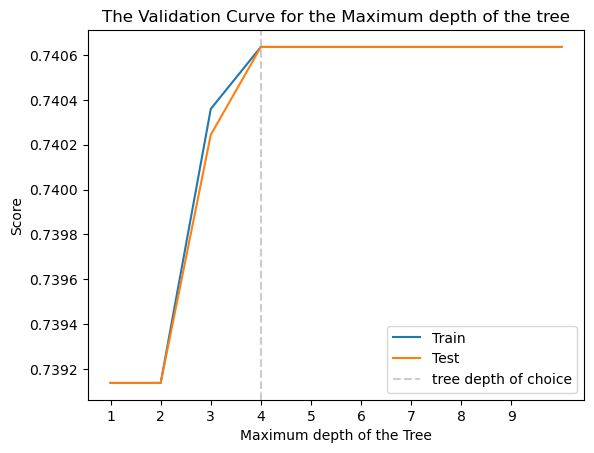

In [17]:
# graph the validation curve
plt.plot(depth_range, cv_train_mean, label = "Train")
plt.plot(depth_range, cv_test_mean, label = "Test")
plt.xlabel("Maximum depth of the Tree")
plt.xticks(np.arange(1, 10, step=1))
plt.axvline(x = 4, alpha = 0.4, color = 'grey', label = 'tree depth of choice').set_linestyle('dashed')
plt.ylabel("Score")
plt.title("The Validation Curve for the Maximum depth of the tree")
plt.legend()
plt.show()


**I will select 4 as the maximum depth of the tree** because the increase of the validation score halts around when the maximum depth of the tree is 4.

#### Q7: Split the data into training and test sets, holding out 20% of the data for testing. Fit a decision tree classifier with the training data using the maximum depth you selected from part 2.6. What is the accuracy score for the test data?

In [18]:
########################################
## Split the Data into Training and test sets
########################################

Xtrain, Xtest, ytrain, ytest = train_test_split(X_donotcall, y_donotcall, test_size=0.2, random_state=311)

In [19]:
########################################
## Fit the decision tree for the training data when the maxiumum tree depth = 4
########################################

# initiate the decision tree object
# fit the decision tree when the maximum_depth = 4
tree_20 = DecisionTreeClassifier(max_depth =4, random_state=311)
tree_20.fit(Xtrain, ytrain)

# show the mean accuracy score
print("The mean accuracy score is "+str(tree_20.score(Xtest, ytest)))


The mean accuracy score is 0.7429792002241054


#### Q8: Construct a confusion matrix for the model in part 2.7. Which type of classification error is most prevalent?

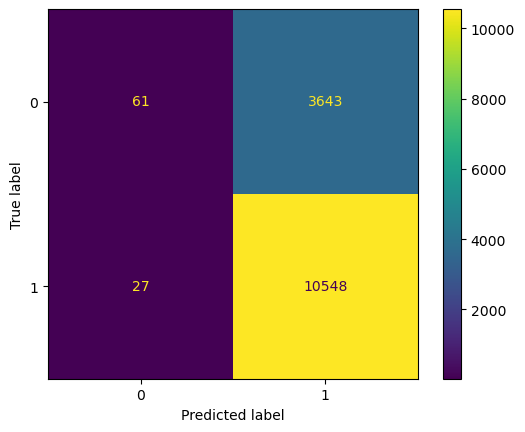

In [20]:
########################################
## Construct a confusion matrix
########################################

# predict the target values based on decision tree
ypredict = tree_20.predict(Xtest)

# construct a confusion matrix
cm = confusion_matrix(ytest, ypredict, labels= tree_20.classes_)

# illustrate the confusion matrix
cm_graph = ConfusionMatrixDisplay(cm, display_labels= tree_20.classes_)
cm_graph.plot()
plt.show()

According to the confusion matrix, **false positive** (predicted to be 1 when it is 0) is the most prevalent error

#### Q9 Plot the decision tree. Provide an interpretation of the plot.

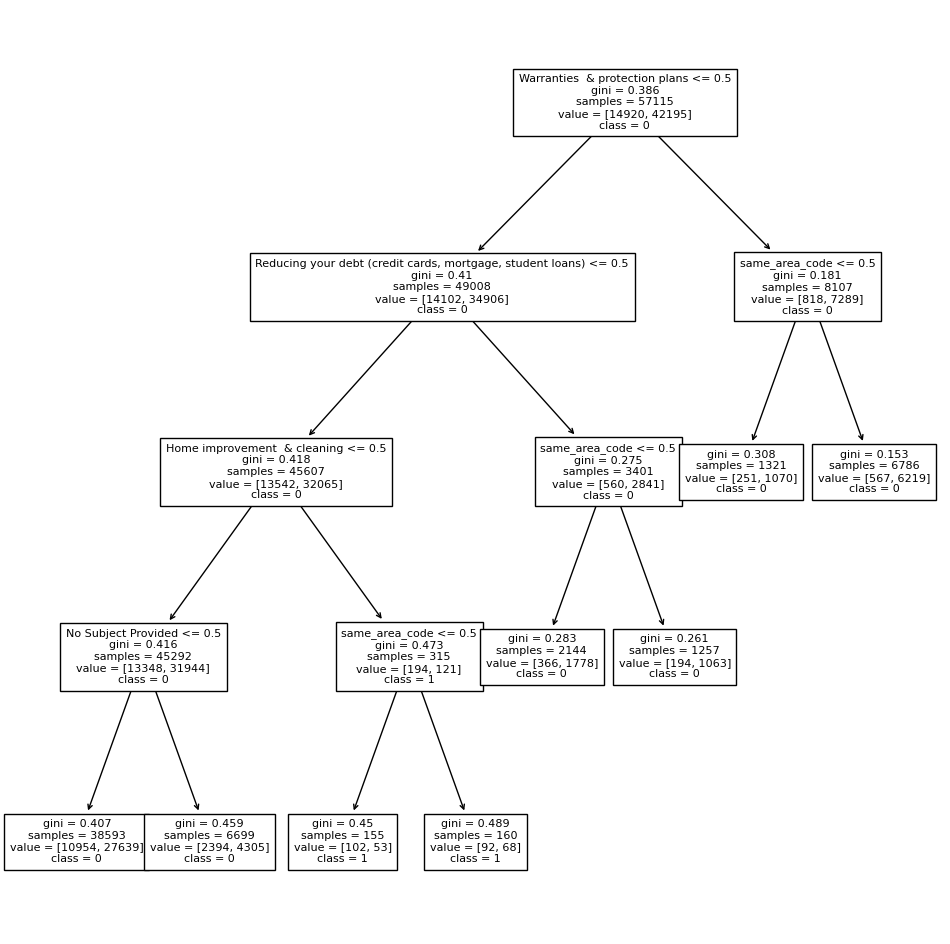

In [21]:
########################################
## Plot a decision tree
########################################
plt.figure(figsize=(12, 12))
plot_tree(tree_20, feature_names = Xtest.columns, 
          class_names = list(set(ytest.astype(str))), fontsize= 8)
plt.show()

The impurity measure decreases comparably significantly when we group by the calls where the subject was on the warrenty or protection plan. In other words, It is more easy to predict a call to be a robocall when the call is about the warrenty or protection plans. We can further improve the prediction of it being a robocall when we create a subgroup that uses the same area code. On the other hand, the predictability of a group that has the calls not about warrenties or protection plans reduces. If we want to further improve the predictability of this group, we can check if the call is about reducing the debt and if the call is from the same area with the consumer. For the cases that are also not about home improvement and cleaning, we can compare if the subject is provided or not to improve the predictability. However, these predictability is not as good as the cases when the calls are about the warrenty or protection plans.